<a href="https://colab.research.google.com/github/daliaydom/marketing-analysis-dashboard/blob/main/marketing_analysis_dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install requirements

In [3]:
!pip install -r requirements.txt

## Download kaggle database

### Mount Google Drive

In [4]:
#Mount yout google drive  Note: you may need to authorize access when prompted
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Upload Kaggle API Token

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"daliaydom","key":"1111d320a321eb63313f0c481039c223"}'}

### Setup Kaggle Directory and Permissions

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!cat ~/.kaggle/kaggle.json

### Download Files

In [8]:
!mkdir /content/drive/MyDrive/marketing-analytics
%cd /content/drive/MyDrive/marketing-analytics
!kaggle datasets download -d jackdaoud/marketing-data

mkdir: cannot create directory ‘/content/drive/MyDrive/marketing-analytics’: File exists
/content/drive/MyDrive/marketing-analytics
Dataset URL: https://www.kaggle.com/datasets/jackdaoud/marketing-data
License(s): CC0-1.0
marketing-data.zip: Skipping, found more recently modified local copy (use --force to force download)


### Unzip the Downloaded Files

In [9]:
path = '/content/drive/MyDrive/marketing-analytics/'

import zipfile
with zipfile.ZipFile(path+'marketing-data.zip', 'r') as zip_ref:
    zip_ref.extractall(path)

## Dataset description

In [10]:
import pandas as pd

In [41]:
df = pd.read_csv(path+'ifood_df.csv')
df.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  education_2n Cycle  education_Basic  education_Graduation  \
0              0                   0                0                     1   
1              0                   0                0                     1   
2              0                   0                0                     1   
3              0                   0                0                     1   
4              0                   0                0                     0   

   education_Master  education_PhD  MntTotal  MntRegularProds  \
0                 0              0      1529             1441   
1                 0              0        21               15   
2                 0              0       734              692   
3                 0              0        48               43   
4                 0              1       407              392   

   AcceptedCmpOverall  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 39 columns]

### Check the data types

In [42]:
print(df.dtypes)

Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Response                  int64
Age                       int64
Customer_Days             int64
marital_Divorced          int64
marital_Married           int64
marital_Single            int64
marital_Together          int64
marital_Widow             int64
educatio

### Check for missing values

In [43]:
print(df.isnull().sum())

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

### Get basic statistics

In [16]:
df.describe()

Income      Kidhome     Teenhome      Recency     MntWines  \
count    2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
mean    51622.094785     0.442177     0.506576    49.009070   306.164626   
std     20713.063826     0.537132     0.544380    28.932111   337.493839   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35196.000000     0.000000     0.000000    24.000000    24.000000   
50%     51287.000000     0.000000     0.000000    49.000000   178.000000   
75%     68281.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2205.000000      2205.000000      2205.000000       2205.000000   
mean     26.403175       165.312018        37.756463         27.128345   
std      39.784484       217.784507        54.824635         41.130468   
min       0.000000         0.000000         0.000000          0.000000   
25%       2.000000        16.000000         3.000000          1.000000   
50%       8.000000        68.000000        12.000000          8.000000   
75%      33.000000       232.000000        50.000000         34.000000   
max     199.000000      1725.000000       259.000000        262.000000   

       MntGoldProds  ...  marital_Together  marital_Widow  education_2n Cycle  \
count   2205.000000  ...       2205.000000    2205.000000         2205.000000   
mean      44.057143  ...          0.257596       0.034467            0.089796   
std       51.736211  ...          0.437410       0.182467            0.285954   
min        0.000000  ...          0.000000       0.000000            0.000000   
25%        9.000000  ...          0.000000       0.000000            0.000000   
50%       25.000000  ...          0.000000       0.000000            0.000000   
75%       56.000000  ...          1.000000       0.000000            0.000000   
max      321.000000  ...          1.000000       1.000000            1.000000   

       education_Basic  education_Graduation  education_Master  education_PhD  \
count      2205.000000           2205.000000       2205.000000    2205.000000   
mean          0.024490              0.504762          0.165079       0.215873   
std           0.154599              0.500091          0.371336       0.411520   
min           0.000000              0.000000          0.000000       0.000000   
25%           0.000000              0.000000          0.000000       0.000000   
50%           0.000000              1.000000          0.000000       0.000000   
75%           0.000000              1.000000          0.000000       0.000000   
max           1.000000              1.000000          1.000000       1.000000   

          MntTotal  MntRegularProds  AcceptedCmpOverall  
count  2205.000000      2205.000000          2205.00000  
mean    562.764626       518.707483             0.29932  
std     575.936911       553.847248             0.68044  
min       4.000000      -283.000000             0.00000  
25%      56.000000        42.000000             0.00000  
50%     343.000000       288.000000             0.00000  
75%     964.000000       884.000000             0.00000  
max    2491.000000      2458.000000             4.00000  

[8 rows x 39 columns]

## Data preparetion

In [44]:
df.columns=[column.split('_')[-1] for i,column in enumerate(df.columns)]
df['Marital'] = df[df.columns[26:31]].idxmax(axis=1)
df['Education'] = df[df.columns[31:36]].idxmax(axis=1)
df.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  2n Cycle  Basic  \
0              172                88            88  ...         0      0   
1                2                 1             6  ...         0      0   
2              111                21            42  ...         0      0   
3               10                 3             5  ...         0      0   
4               46                27            15  ...         0      0   

   Graduation  Master  PhD  MntTotal  MntRegularProds  AcceptedCmpOverall  \
0           1       0    0      1529             1441                   0   
1           1       0    0        21               15                   0   
2           1       0    0       734              692                   0   
3           1       0    0        48               43                   0   
4           0       0    1       407              392                   0   

    Marital   Education  
0    Single  Graduation  
1    Single  Graduation  
2  Together  Graduation  
3  Together  Graduation  
4   Married         PhD  

[5 rows x 41 columns]

In [45]:
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']
df[campaign_cols]=df[campaign_cols].replace({1: "Accepted", 0: "Not Accepted"})

In [47]:
df['Complain']=df['Complain'].replace({1: "Complain", 0: "No complain"})

In [31]:
%cd ../../../

/


In [48]:
df.to_csv('customers.csv', index=False)

In [14]:
list(df.columns[:15])+['MntTotal', 'MntRegularProds','Age','Customer_Days','Z_CostContact','Z_Revenue']

['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'MntTotal',
 'MntRegularProds',
 'Age',
 'Customer_Days',
 'Z_CostContact',
 'Z_Revenue']

In [17]:
list(df.columns[15:20]) + ['Response']

['AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response']

In [ ]:
categorical_col = list(df.columns[20:-3])
for item in ['Age','Customer_Days','Z_CostContact','Z_Revenue','Response']:
  categorical_col.remove(item)
categorical_col

In [ ]:
print(df.describe())

# Visualization


## Create new data frames


In [39]:
import matplotlib.pyplot as plt

In [33]:
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']
acceptance_percentages = df[campaign_cols].mean() * 100

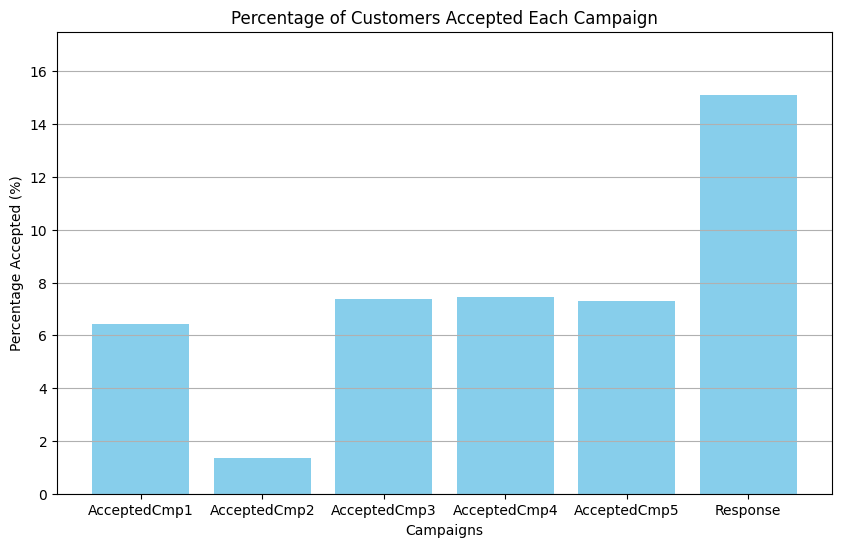

In [42]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(acceptance_percentages.index, acceptance_percentages.values, color='skyblue')
ax.set_xlabel('Campaigns')
ax.set_ylabel('Percentage Accepted (%)')
ax.set_title('Percentage of Customers Accepted Each Campaign')
ax.set_ylim(0, 17.5)  # Ensure y-axis starts at 0 and goes up to 100
ax.grid(True, axis='y')

marital columns 26-31

In [16]:
df.columns=[column.split('_')[-1] for i,column in enumerate(df.columns)]

In [17]:
df['marital'] = df[df.columns[26:31]].idxmax(axis=1)

education columns 31-36

In [18]:
df['education'] = df[df.columns[31:36]].idxmax(axis=1)

In [19]:
import plotly.express as px
fig = px.sunburst(df, path=['Response', 'marital', 'education','Complain'])
fig.show()

In [31]:
import plotly.graph_objects as go
fig = go.Figure()

catn1, catn2 = 'education','Response'
val_catn2 = (0,1)
num1 = 'Income'

fig.add_trace(go.Violin(x=df[catn1][ df[catn2] == val_catn2[0] ],
                        y=df[num1][ df[catn2] == val_catn2[0] ],
                        legendgroup=val_catn2[0], scalegroup=val_catn2[0], name=val_catn2[0],
                        side='negative',
                        line_color='blue')
             )
fig.add_trace(go.Violin(x=df[catn1][ df[catn2] == val_catn2[1] ],
                        y=df[num1][ df[catn2] == val_catn2[1] ],
                        legendgroup=val_catn2[1], scalegroup=val_catn2[1], name=val_catn2[1],
                        side='positive',
                        line_color='orange')
             )
fig.update_traces(meanline_visible=True)
fig.update_layout(violingap=0, violinmode='overlay')
fig.show()

In [21]:
import seaborn as sns

In [22]:
list(df.columns[:15])+['MntTotal', 'MntRegularProds','Age','Customer_Days','Z_CostContact','Z_Revenue']

['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'MntTotal',
 'MntRegularProds',
 'Age',
 'Customer_Days',
 'Z_CostContact',
 'Z_Revenue']

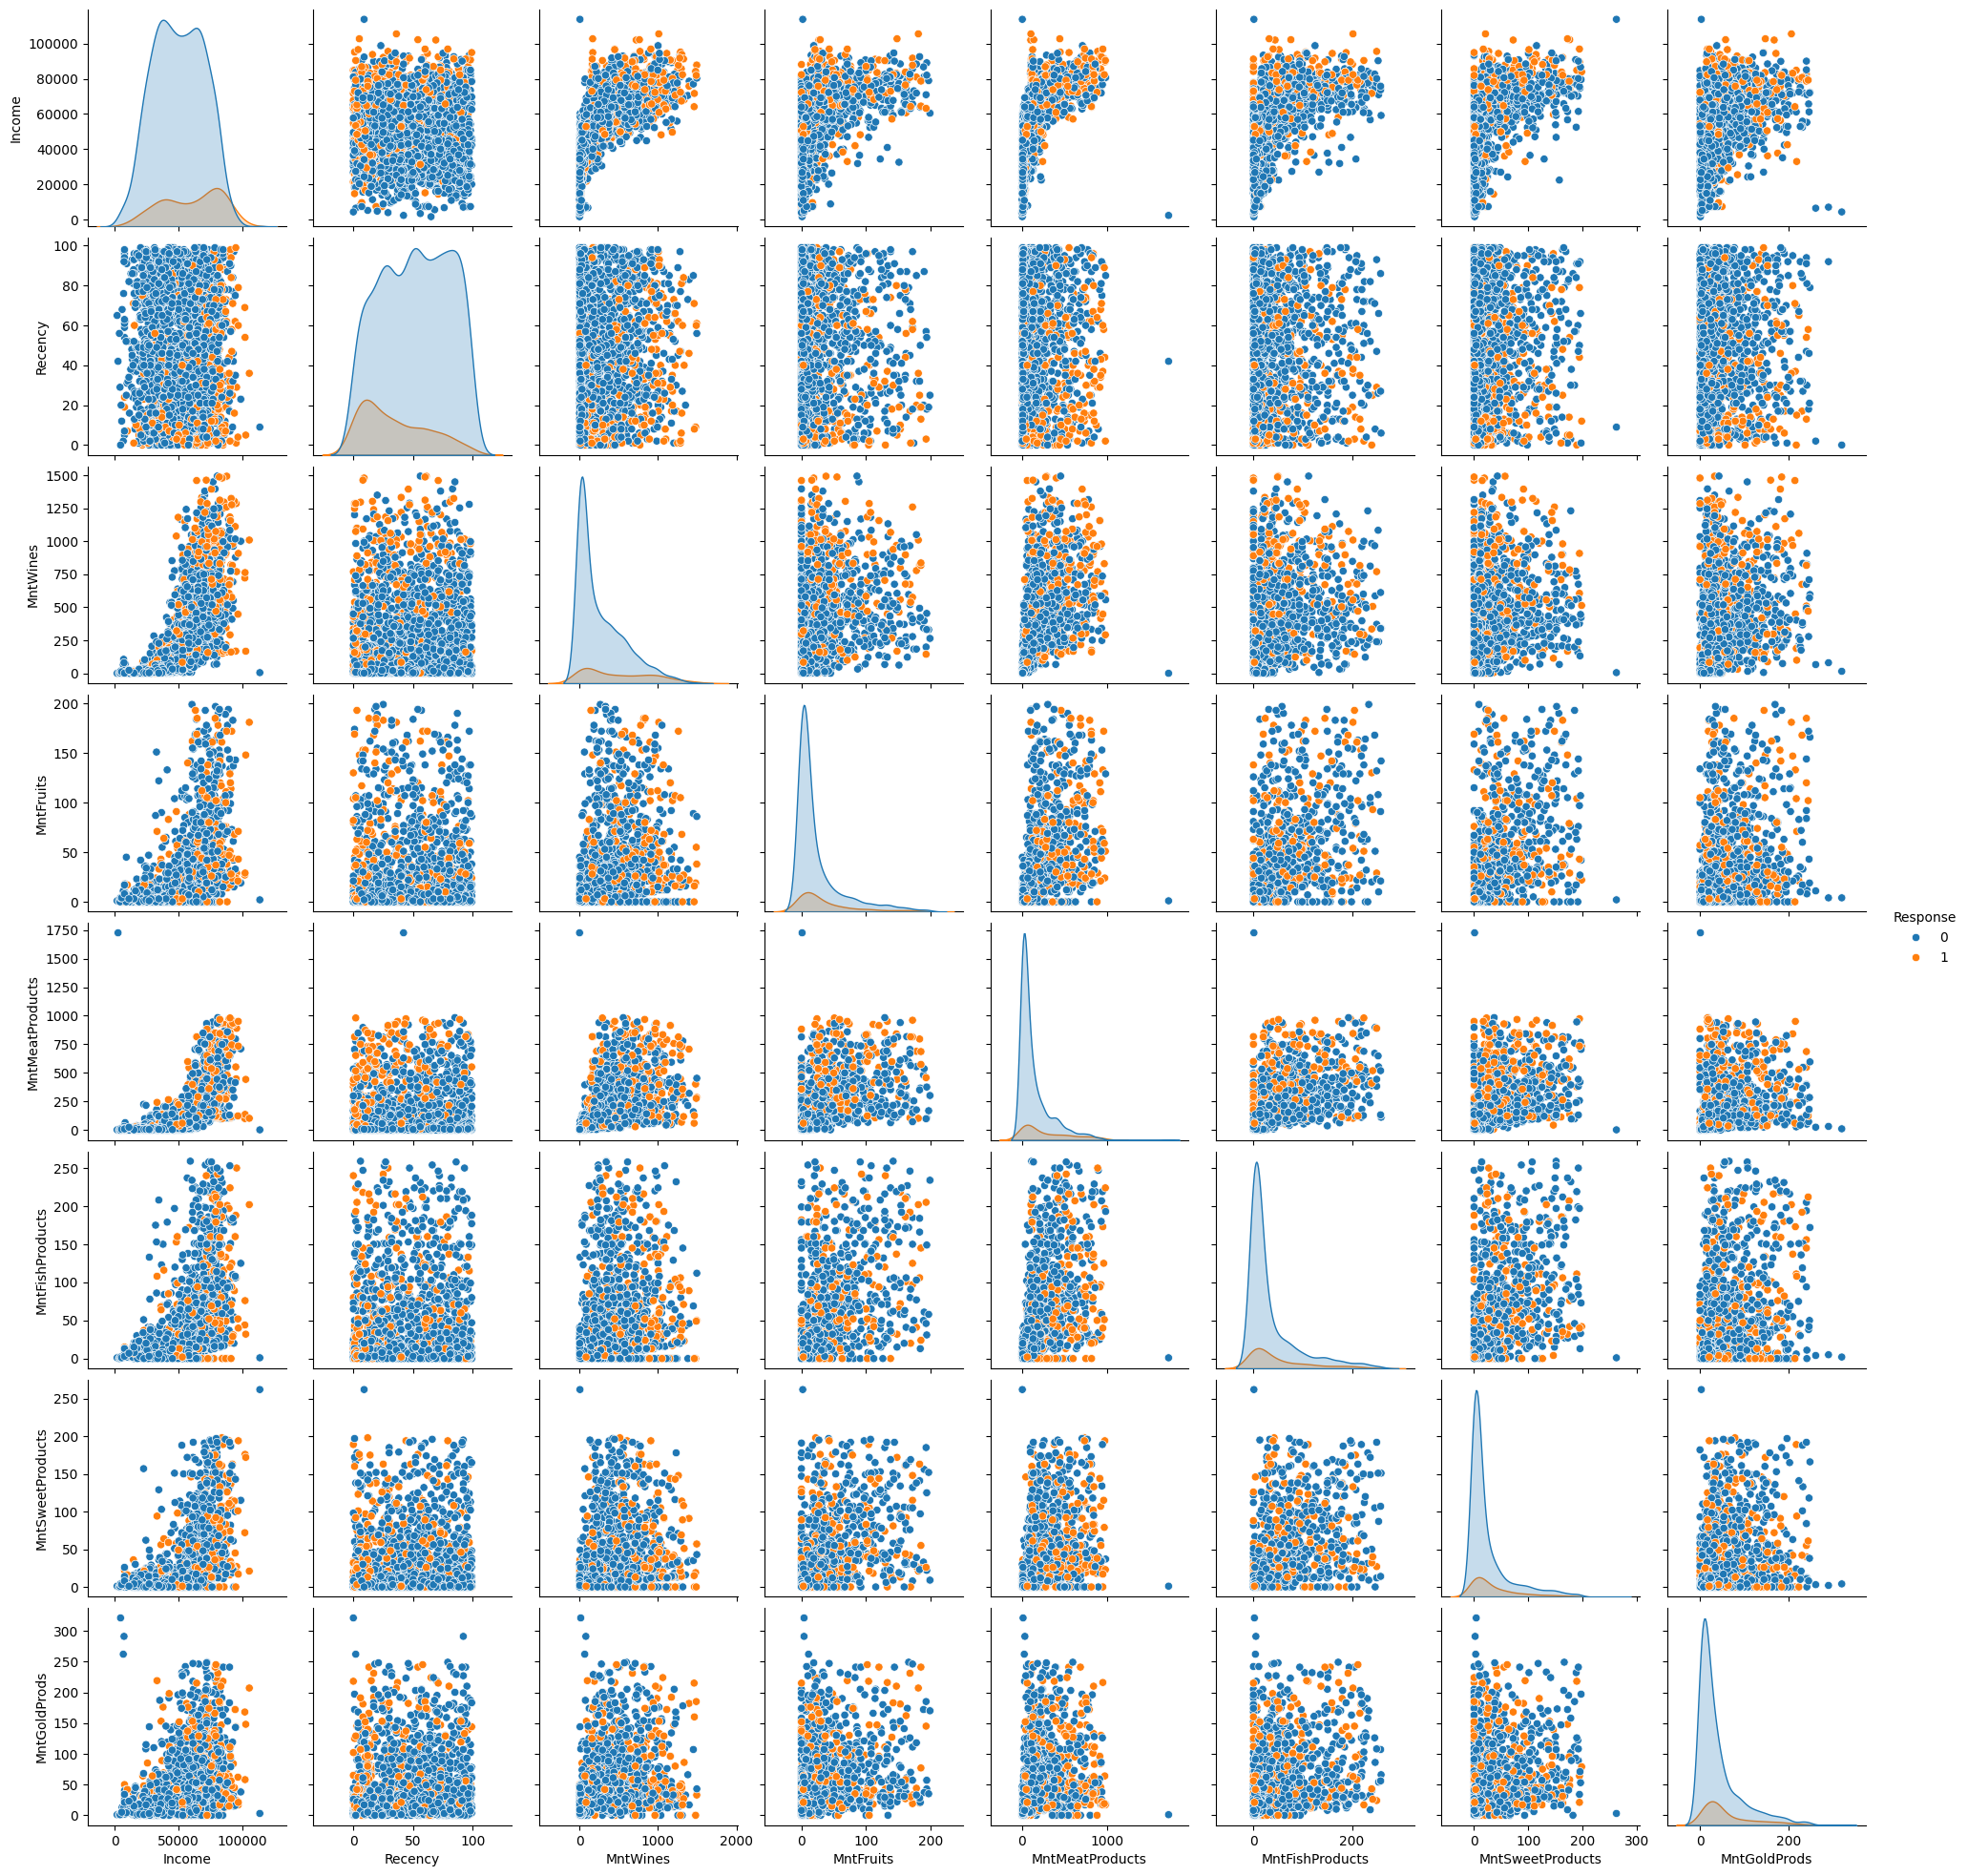

In [23]:
fig = sns.pairplot(df[['Income','Recency','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','Response']], hue="Response")

# Dashboard

In [24]:
!pip install streamlit plotly
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 85.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.7 MB/s eta 0:00:00


In [25]:
%cd ../../../
!ls

/content
drive  kaggle.json  sample_data


In [49]:
!wget -q -O - ipv4.icanhazip.com

34.80.35.217


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.80.35.217:8501

npx: installed 22 in 2.729s
your url is: https://fair-months-mate.loca.lt
2024-06-17 13:08:34.030 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py", line 1680, in _ensure_numeric
    x = x.astype(np.complex128)
ValueError: complex() arg is a malformed string

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py", line 1683, in _ensure_numeric
    x = x.astype(np.float64)
ValueError: could not convert string to float: 'Not AcceptedNot AcceptedNot AcceptedNot AcceptedNot AcceptedNot AcceptedNot AcceptedNot AcceptedNot AcceptedNot AcceptedNot AcceptedNot AcceptedNot AcceptedNot AcceptedAcceptedNot AcceptedNot AcceptedAcc

In [2]:
!pip freeze > requirements.txt